<a href="https://colab.research.google.com/github/ckzj12/Tensorflow2.0_Gradient-Descent_example/blob/master/GD_example_re.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
print(tf.__version__)

import matplotlib.pyplot as plt
import numpy as np

2.0.0


# Gradient Descent

Note: in this example, gradient descent is performed for 20 times, without tolerance check

Set up the initial values (Just for checking)

In [0]:
w = tf.Variable(3, name='theta', dtype=tf.float32)
loss = tf.math.square(w) # Assumed loss function

print(w.numpy(), loss.numpy())

3.0 9.0


Run the gradient descent with learning rate of 0.3

In [0]:
learning_rate = 0.3
GD_hist = [] # Initialize history list

for i in range(20):
    with tf.GradientTape() as g:
        g.watch(w)
        loss = tf.math.square(w)
    dloss_dw = g.gradient(loss, w)
    
    # Append to history
    GD_hist.append((w,loss))
    
    # Update w
    w = w - learning_rate * (dloss_dw)
    
    # print
    print("Updated w is")
    tf.print(w)
    #print("and gradient was {}".format(dloss_dw))
    #print("\n")

Updated w is
1.19999993
Updated w is
0.479999959
Updated w is
0.191999972
Updated w is
0.0767999813
Updated w is
0.0307199918
Updated w is
0.0122879967
Updated w is
0.00491519831
Updated w is
0.00196607923
Updated w is
0.000786431599
Updated w is
0.000314572622
Updated w is
0.000125829043
Updated w is
5.03316114e-05
Updated w is
2.01326438e-05
Updated w is
8.05305717e-06
Updated w is
3.22122287e-06
Updated w is
1.2884891e-06
Updated w is
5.15395584e-07
Updated w is
2.06158234e-07
Updated w is
8.24632878e-08
Updated w is
3.29853123e-08


As shown above, the optimzed value of w is converged to 0 <br> We can check it with plot

In [0]:
# Plot data gen.

wData = np.arange(-10,10,0.1)
lossData = wData ** 2

Now, plot the figure

Let's initialize w, and see how the gradient descent has been done.

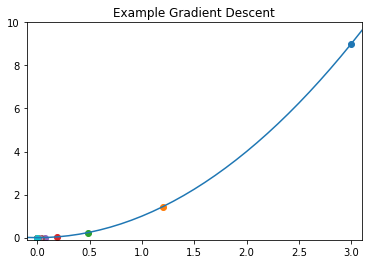

In [0]:
plt.figure()
for num, item in enumerate(GD_hist):
    plt.plot(item[0].numpy(),item[1].numpy(),"o")
plt.title('Example Gradient Descent')
plt.plot(wData,lossData)
plt.xlim([-0.1, 3.1])
plt.ylim([-0.1, 10])
plt.show()

The gradient descent goes from initial value (w = 3.0) to optimized value (w = 0.0)

# Gradient descent with data points and hypothesis

Assume the hypothesis is linear (h(x) = w * x + w0) <br> And the given data points are [1,2], [2,4], [3,3.5]  <a id='another_cell'></a>

In [0]:
dataX = [1,2,3]
dataY = [2,1,1.5]
numData = len(dataX)

(0, 5)

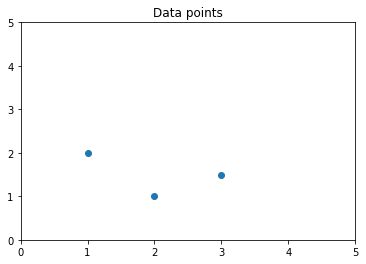

In [0]:
plt.figure()
plt.plot(dataX,dataY,'o')
plt.title("Data points")
plt.xlim([0, 5])
plt.ylim([0, 5])

the loss function can be defined as sum of (h(x) - y)^2

In here, starting wegiths (w and w0) are assumed to be 1 (both values)

In [0]:
w = tf.Variable(1, name='w', dtype=tf.float32) # Initialize w
w0 = tf.Variable(1, name='w0', dtype=tf.float32) # Initialize w0

Now, define h(x) <a id='hypothesis'></a>

In [0]:
def h(x):
    return w * x + w0

Let's check the initial values

In [0]:
print(h(dataX).numpy())
print(dataY)
print((h(dataX).numpy() - dataY) ** 2)
print("Initial loss = {}".format(sum((h(dataX).numpy() - dataY) ** 2)))

[2. 3. 4.]
[2, 1, 1.5]
[0.   4.   6.25]
Initial loss = 10.25


In [0]:
loss = sum((h(dataX) - dataY) ** 2)
print("Initial loss is {}".format(loss))

Initial loss is 10.25


Check the initial plot

In [0]:
xPlot = np.arange(0,5,0.1)
hPlot = h(xPlot)

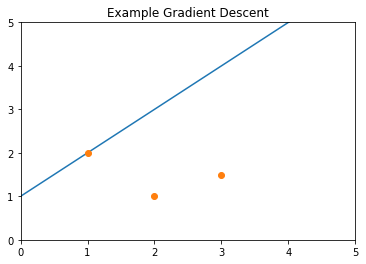

In [0]:
plt.figure()
plt.title('Example Gradient Descent')
plt.plot(xPlot,hPlot)
plt.plot(dataX,dataY,'o')
plt.xlim([0, 5])
plt.ylim([0, 5])
plt.show()

Now, run the gradient descent

Loss is
0.0625840724


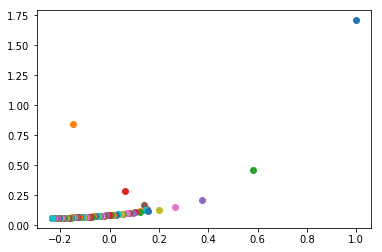

In [0]:
learning_rate = 0.3

for i in range(100):
    with tf.GradientTape() as g:
        with tf.GradientTape() as g0:
            g.watch(w)
            g0.watch(w0)
            loss = 1/(2*numData) * sum((h(dataX) - dataY) ** 2)
    dloss_dw = g.gradient(loss, w)
    dloss_dw0 = g0.gradient(loss, w0)
    
    # Update w
    wNew = w - learning_rate * (dloss_dw)
    w0New = w0 - learning_rate * (dloss_dw0)
    lossNew = tf.math.square(wNew)
    
    # print
    plt.plot(w.numpy(),loss.numpy(),"o")
    
    # Update
    w = wNew
    w0 = w0New
    
    
    
print("Loss is")
tf.print(loss)


Let's check the updated w and w0 as follows:

In [0]:
print(w.numpy(), w0.numpy())

-0.23548318 1.9669998


Now, check the result

In [0]:
xPlot = np.arange(0,5,0.1)
hPlot = h(xPlot)

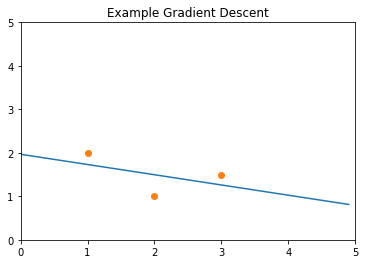

In [0]:
plt.title('Example Gradient Descent')
plt.plot()
plt.plot(xPlot,hPlot)
plt.plot(dataX,dataY,'o')
plt.xlim([0, 5])
plt.ylim([0, 5])
plt.show()

You can try with your own data points by changing dataX and dataY above in [Here](#another_cell)

You can also change the hypothesis (for example, to quadratic function) and run the gradient descent. <br> You can modify your hypothesis in [Here](#hypothesis)